# Identifying Age-Related Conditions Using Machine Learning Models
## Author: Boni M. Ale, MD, MSc, MPH
### Date: 10 July 2023

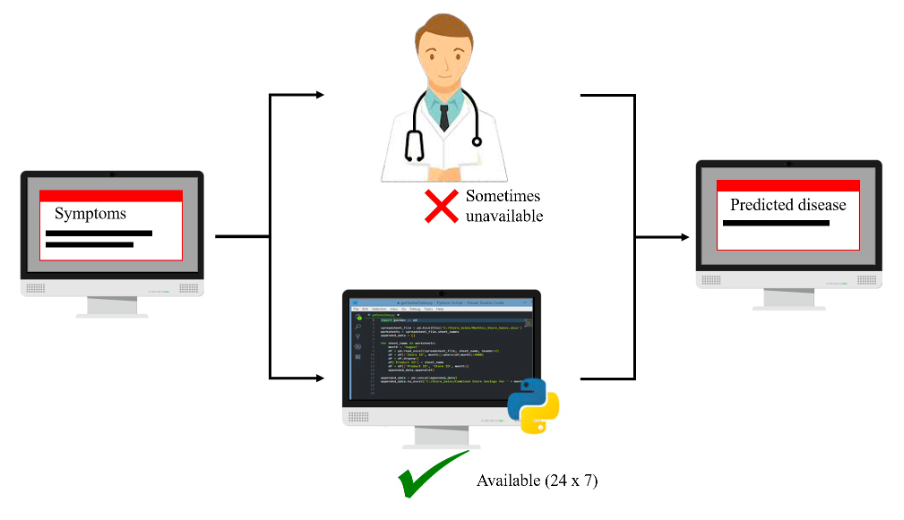

# Table of content

Introduction
1. Exploratory data analysis (EDA)
2. Data Wrangling
3. Data Modelling

Conclusion

# 1. Introduction

Machine learning can be a powerful tool for disease prediction. By analyzing large amounts of data and identifying patterns, machine learning models can learn to recognize subtle indicators and make predictions about disease risk or diagnosis. In this project, I will use machine learning models to detect conditions with measurements of anonymous characteristics. To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

The aim of this project is to predict if a person has any of three medical conditions using a Kaggle datasets freely available [here](https://www.kaggle.com/competitions/icr-identify-age-related-conditions/overview). In order to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0), I will create models trained on anonymous measurements of health characteristics provided in the the datasets.

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter



# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

**Load Datasets**

In [2]:
train_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/train.csv')
test = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/test.csv')
greeks_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/greeks.csv')
sample_submission = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/sample_submission.csv')

# 2. Exploratory Data Analysis

## 2.1. Data Description

### ‚Üí Train Data 

In [3]:
print("Raw Train Data Set's size: ", train_raw.shape)

#separate variables into new data frames
numeric_data = train_raw.select_dtypes(include=[np.number])
cat_data = train_raw.select_dtypes(exclude=[np.number])
cat_data = cat_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in train raw data".format(numeric_data.shape[1],cat_data.shape[1]))

Raw Train Data Set's size:  (617, 58)
There are 56 numeric and 1 categorical columns in train raw data


In [4]:
train_raw.describe().T

count          mean           std          min          25%  \
AB     617.0      0.477149      0.468388     0.081187     0.252107   
AF     617.0   3502.013221   2300.322717   192.593280  2197.345480   
AH     617.0    118.624513    127.838950    85.200147    85.200147   
AM     617.0     38.968552     69.728226     3.177522    12.270314   
AR     617.0     10.128242     10.518877     8.138688     8.138688   
AX     617.0      5.545576      2.551696     0.699861     4.128294   
AY     617.0      0.060320      0.416817     0.025578     0.025578   
AZ     617.0     10.566447      4.350645     3.396778     8.129580   
BC     617.0      8.053012     65.166943     1.229900     1.229900   
BD     617.0   5350.388655   3021.326641  1693.624320  4155.702870   
BN     617.0     21.419492      3.478278     9.886800    19.420500   
BP     617.0    231.322223    183.992505    72.948951   156.847239   
BQ     557.0     98.328737     96.479371     1.331155    27.834425   
BR     617.0   1218.133238   7575.293707    51.216883   424.990642   
BZ     617.0    550.632525   2076.371275   257.432377   257.432377   
CB     615.0     77.104151    159.049302    12.499760    23.317567   
CC     614.0      0.688801      0.263994     0.176874     0.563688   
CD     617.0     90.251735     51.585130    23.387600    64.724192   
CF     617.0     11.241064     13.571133     0.510888     5.066306   
CH     617.0      0.030615      0.014808     0.003184     0.023482   
CL     617.0      1.403761      1.922210     1.050225     1.050225   
CR     617.0      0.742262      0.281195     0.069225     0.589575   
CS     617.0     36.917590     17.266347    13.784111    29.782467   
CU     617.0      1.383792      0.538717     0.137925     1.070298   
CW     617.0     27.165653     14.645993     7.030640     7.030640   
DA     617.0     51.128326     21.210888     6.906400    37.942520   
DE     617.0    401.901299    317.745623    35.998895   188.815690   
DF     617.0      0.633884      1.912384     0.238680     0.238680   
DH     617.0      0.367002      0.112989     0.040995     0.295164   
DI     617.0    146.972099     86.084419    60.232470   102.703553   
DL     617.0     94.795377     28.243187    10.345600    78.232240   
DN     617.0     26.370568      8.038825     6.339496    20.888264   
DU     616.0      1.802900      9.034721     0.005518     0.005518   
DV     617.0      1.924830      1.484555     1.743070     1.743070   
DY     617.0     26.388989     18.116679     0.804068    14.715792   
EB     617.0      9.072700      6.200281     4.926396     5.965392   
EE     617.0      3.064778      2.058344     0.286201     1.648679   
EG     617.0   1731.248215   1790.227476   185.594100  1111.160625   
EH     617.0      0.305107      1.847499     0.003042     0.003042   
EL     557.0     69.582596     38.555707     5.394675    30.927468   
EP     617.0    105.060712     68.445620    78.526968    78.526968   
EU     617.0     69.117005    390.187057     3.828384     4.324656   
FC     616.0     71.341526    165.551545     7.534128    25.815384   
FD     617.0      6.930086     64.754262     0.296850     0.296850   
FE     617.0  10306.810737  11331.294051  1563.136688  5164.666260   
FI     617.0     10.111079      2.934025     3.583450     8.523098   
FL     616.0      5.433199     11.496257     0.173229     0.173229   
FR     617.0      3.533905     50.181948     0.497060     0.497060   
FS     615.0      0.421501      1.305365     0.067730     0.067730   
GB     617.0     20.724856      9.991907     4.102182    14.036718   
GE     617.0    131.714987    144.181524    72.611063    72.611063   
GF     617.0  14679.595398  19352.959387    13.038894  2798.992584   
GH     617.0     31.489716      9.864239     9.432735    25.034888   
GI     617.0     50.584437     36.266251     0.897628    23.011684   
GL     616.0      8.530961     10.327010     0.001129     0.124392   
Class  617.0      0.175041      0.380310     0.000000     0.000000   

               5

It seems like there is 56 numeric variables which include our target ("if the person has one or more of any of the three medical conditions (Class 1)" or "none of the three medical conditions (Class 0)"). Therefore Class is actually a binary categorical variable. 

### ‚Üí Test Data

In [5]:
print("Raw Test Data Set's size: ", test.shape)

#separate variables into new data frames
numtest_data = test.select_dtypes(include=[np.number])
cattest_data = test.select_dtypes(exclude=[np.number])
cattest_data = cattest_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in test raw data".format(numtest_data.shape[1],cattest_data.shape[1]))

Raw Test Data Set's size:  (5, 57)
There are 55 numeric and 1 categorical columns in test raw data


In [6]:
test.describe().T

count  mean  std  min  25%  50%  75%  max
AB     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AF     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AH     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AM     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AR     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AX     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AY     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
AZ     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BC     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BD     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BN     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BP     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BQ     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BR     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BZ     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CB     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CC     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CD     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CF     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CH     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CL     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CR     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CS     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CU     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
CW     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DA     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DE     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DF     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DH     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DI     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DL     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DN     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DU     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DV     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
DY     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EB     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EE     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EG     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EH     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EL     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EP     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
EU     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FC     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FD     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FE     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FI     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FL     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FR     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
FS     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GB     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GE     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GF     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GH     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GI     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
GL     5.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In the test dataset all values are the same apart from the Id.  

### ‚Üí Greek Data

In [7]:
print("Raw Greek Data Set's size: ", greeks_raw.shape)

#separate variables into new data frames
numgreeks_data = greeks_raw.select_dtypes(include=[np.number])
catgreeks_data = greeks_raw.select_dtypes(exclude=[np.number])
catgreeks_data = catgreeks_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in test raw data".format(numgreeks_data.shape[1],catgreeks_data.shape[1]))

Raw Greek Data Set's size:  (617, 6)
There are 0 numeric and 5 categorical columns in test raw data


In [8]:
greeks_raw.describe().T

count unique           top freq
Id        617    617  000ff2bfdfe9    1
Alpha     617      4             A  509
Beta      617      3             C  407
Gamma     617      8             M  445
Delta     617      4             B  456
Epsilon   617    198       Unknown  144

### ‚Üí Data Augmentation

In [9]:
df_train_greeks = train_raw.merge(greeks_raw, on ='Id',how ='left')
df_train_greeks.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...            GF         GH  \
0  0.699861  0.025578   9.812214    5.555634  ...   2003.810319  22.136229   
1  3.632190  0.025578  13.517790    1.229900  ...  27981.562750  29.135430   
2  6.732840  0.025578  12.824570    1.229900  ...  13676.957810  28.022851   
3  3.685344  0.025578  11.053708    1.229900  ...   2094.262452  39.948656   
4  3.942255  0.054810   3.396778  102.151980  ...   8524.370502  45.381316   

          GI         GL  Class  Alpha  Beta  Gamma  Delta    Epsilon  
0  69.834944   0.120343      1      B     C      G      D  3/19/2019  
1  32.131996  21.978000      0      A     C      M      B    Unknown  
2  35.192676   0.196941      0      A     C      M      B    Unknown  
3  90.493248   0.155829      0      A     C      M      B    Unknown  
4  36.262628   0.096614      1      D     B      F      B  3/25/2020  

[5 rows x 63 columns]

In [10]:
df_train_greeks.describe().T

count          mean           std          min          25%  \
AB     617.0      0.477149      0.468388     0.081187     0.252107   
AF     617.0   3502.013221   2300.322717   192.593280  2197.345480   
AH     617.0    118.624513    127.838950    85.200147    85.200147   
AM     617.0     38.968552     69.728226     3.177522    12.270314   
AR     617.0     10.128242     10.518877     8.138688     8.138688   
AX     617.0      5.545576      2.551696     0.699861     4.128294   
AY     617.0      0.060320      0.416817     0.025578     0.025578   
AZ     617.0     10.566447      4.350645     3.396778     8.129580   
BC     617.0      8.053012     65.166943     1.229900     1.229900   
BD     617.0   5350.388655   3021.326641  1693.624320  4155.702870   
BN     617.0     21.419492      3.478278     9.886800    19.420500   
BP     617.0    231.322223    183.992505    72.948951   156.847239   
BQ     557.0     98.328737     96.479371     1.331155    27.834425   
BR     617.0   1218.133238   7575.293707    51.216883   424.990642   
BZ     617.0    550.632525   2076.371275   257.432377   257.432377   
CB     615.0     77.104151    159.049302    12.499760    23.317567   
CC     614.0      0.688801      0.263994     0.176874     0.563688   
CD     617.0     90.251735     51.585130    23.387600    64.724192   
CF     617.0     11.241064     13.571133     0.510888     5.066306   
CH     617.0      0.030615      0.014808     0.003184     0.023482   
CL     617.0      1.403761      1.922210     1.050225     1.050225   
CR     617.0      0.742262      0.281195     0.069225     0.589575   
CS     617.0     36.917590     17.266347    13.784111    29.782467   
CU     617.0      1.383792      0.538717     0.137925     1.070298   
CW     617.0     27.165653     14.645993     7.030640     7.030640   
DA     617.0     51.128326     21.210888     6.906400    37.942520   
DE     617.0    401.901299    317.745623    35.998895   188.815690   
DF     617.0      0.633884      1.912384     0.238680     0.238680   
DH     617.0      0.367002      0.112989     0.040995     0.295164   
DI     617.0    146.972099     86.084419    60.232470   102.703553   
DL     617.0     94.795377     28.243187    10.345600    78.232240   
DN     617.0     26.370568      8.038825     6.339496    20.888264   
DU     616.0      1.802900      9.034721     0.005518     0.005518   
DV     617.0      1.924830      1.484555     1.743070     1.743070   
DY     617.0     26.388989     18.116679     0.804068    14.715792   
EB     617.0      9.072700      6.200281     4.926396     5.965392   
EE     617.0      3.064778      2.058344     0.286201     1.648679   
EG     617.0   1731.248215   1790.227476   185.594100  1111.160625   
EH     617.0      0.305107      1.847499     0.003042     0.003042   
EL     557.0     69.582596     38.555707     5.394675    30.927468   
EP     617.0    105.060712     68.445620    78.526968    78.526968   
EU     617.0     69.117005    390.187057     3.828384     4.324656   
FC     616.0     71.341526    165.551545     7.534128    25.815384   
FD     617.0      6.930086     64.754262     0.296850     0.296850   
FE     617.0  10306.810737  11331.294051  1563.136688  5164.666260   
FI     617.0     10.111079      2.934025     3.583450     8.523098   
FL     616.0      5.433199     11.496257     0.173229     0.173229   
FR     617.0      3.533905     50.181948     0.497060     0.497060   
FS     615.0      0.421501      1.305365     0.067730     0.067730   
GB     617.0     20.724856      9.991907     4.102182    14.036718   
GE     617.0    131.714987    144.181524    72.611063    72.611063   
GF     617.0  14679.595398  19352.959387    13.038894  2798.992584   
GH     617.0     31.489716      9.864239     9.432735    25.034888   
GI     617.0     50.584437     36.266251     0.897628    23.011684   
GL     616.0      8.530961     10.327010     0.001129     0.124392   
Class  617.0      0.175041      0.380310     0.000000     0.000000   

               5

## 2.2. Numerical Variables Exploration

Let's work on numeriacal features.

In [11]:
Target = ['Class']
allFeature = df_train_greeks.columns.tolist()
included_features = [feature for feature in allFeature if feature not in Target]

numericalFeatures = df_train_greeks[included_features].select_dtypes(include=['number'])
categoricalFeatures = df_train_greeks[included_features].select_dtypes(include=['object', ])

In [12]:
num_cols = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL','Class']
num_cnt_cols = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']
nominal_cols = ['EJ', 'Alpha','Beta', 'Gamma', 'Delta']

In [13]:
numericalFeatures.head()

AB          AF          AH         AM        AR        AX        AY  \
0  0.209377  3109.03329   85.200147  22.394407  8.138688  0.699861  0.025578   
1  0.145282   978.76416   85.200147  36.968889  8.138688  3.632190  0.025578   
2  0.470030  2635.10654   85.200147  32.360553  8.138688  6.732840  0.025578   
3  0.252107  3819.65177  120.201618  77.112203  8.138688  3.685344  0.025578   
4  0.380297  3733.04844   85.200147  14.103738  8.138688  3.942255  0.054810   

          AZ          BC         BD   ...         FI        FL        FR  \
0   9.812214    5.555634  4126.58731  ...   3.583450  7.298162   1.73855   
1  13.517790    1.229900  5496.92824  ...  10.358927  0.173229   0.49706   
2  12.824570    1.229900  5135.78024  ...  11.626917  7.709560   0.97556   
3  11.053708    1.229900  4169.67738  ...  14.852022  6.122162   0.49706   
4   3.396778  102.151980  5728.73412  ...  13.666727  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  
0   0.120343  
1  21.978000  
2   0.196941  
3   0.155829  
4   0.096614  

[5 rows x 55 columns]

In [14]:
categoricalFeatures.head(10)

Id EJ Alpha Beta Gamma Delta    Epsilon
0  000ff2bfdfe9  B     B    C     G     D  3/19/2019
1  007255e47698  A     A    C     M     B    Unknown
2  013f2bd269f5  B     A    C     M     B    Unknown
3  043ac50845d5  B     A    C     M     B    Unknown
4  044fb8a146ec  B     D    B     F     B  3/25/2020
5  04517a3c90bd  A     A    C     M     B  10/1/2019
6  049232ca8356  B     A    C     M     B  5/29/2019
7  057287f2da6d  B     A    C     M     B  4/24/2019
8  0594b00fb30a  B     A    C     M     B  2/18/2019
9  05f2bc0155cd  A     A    B     M     B  6/19/2020

üëâüèΩ There is actually 56 numeric variables and 6 categorical variables apart from 'Id' and 'Epsilon'. I am not interested in using Epsilon because of the nature of the data which I bearly understand. There are date but not clear the date of what it is üò´. 

### 2.2.1. Overall Distribution of Numerical Features

Let's explore the overall distribution of the numerical features.

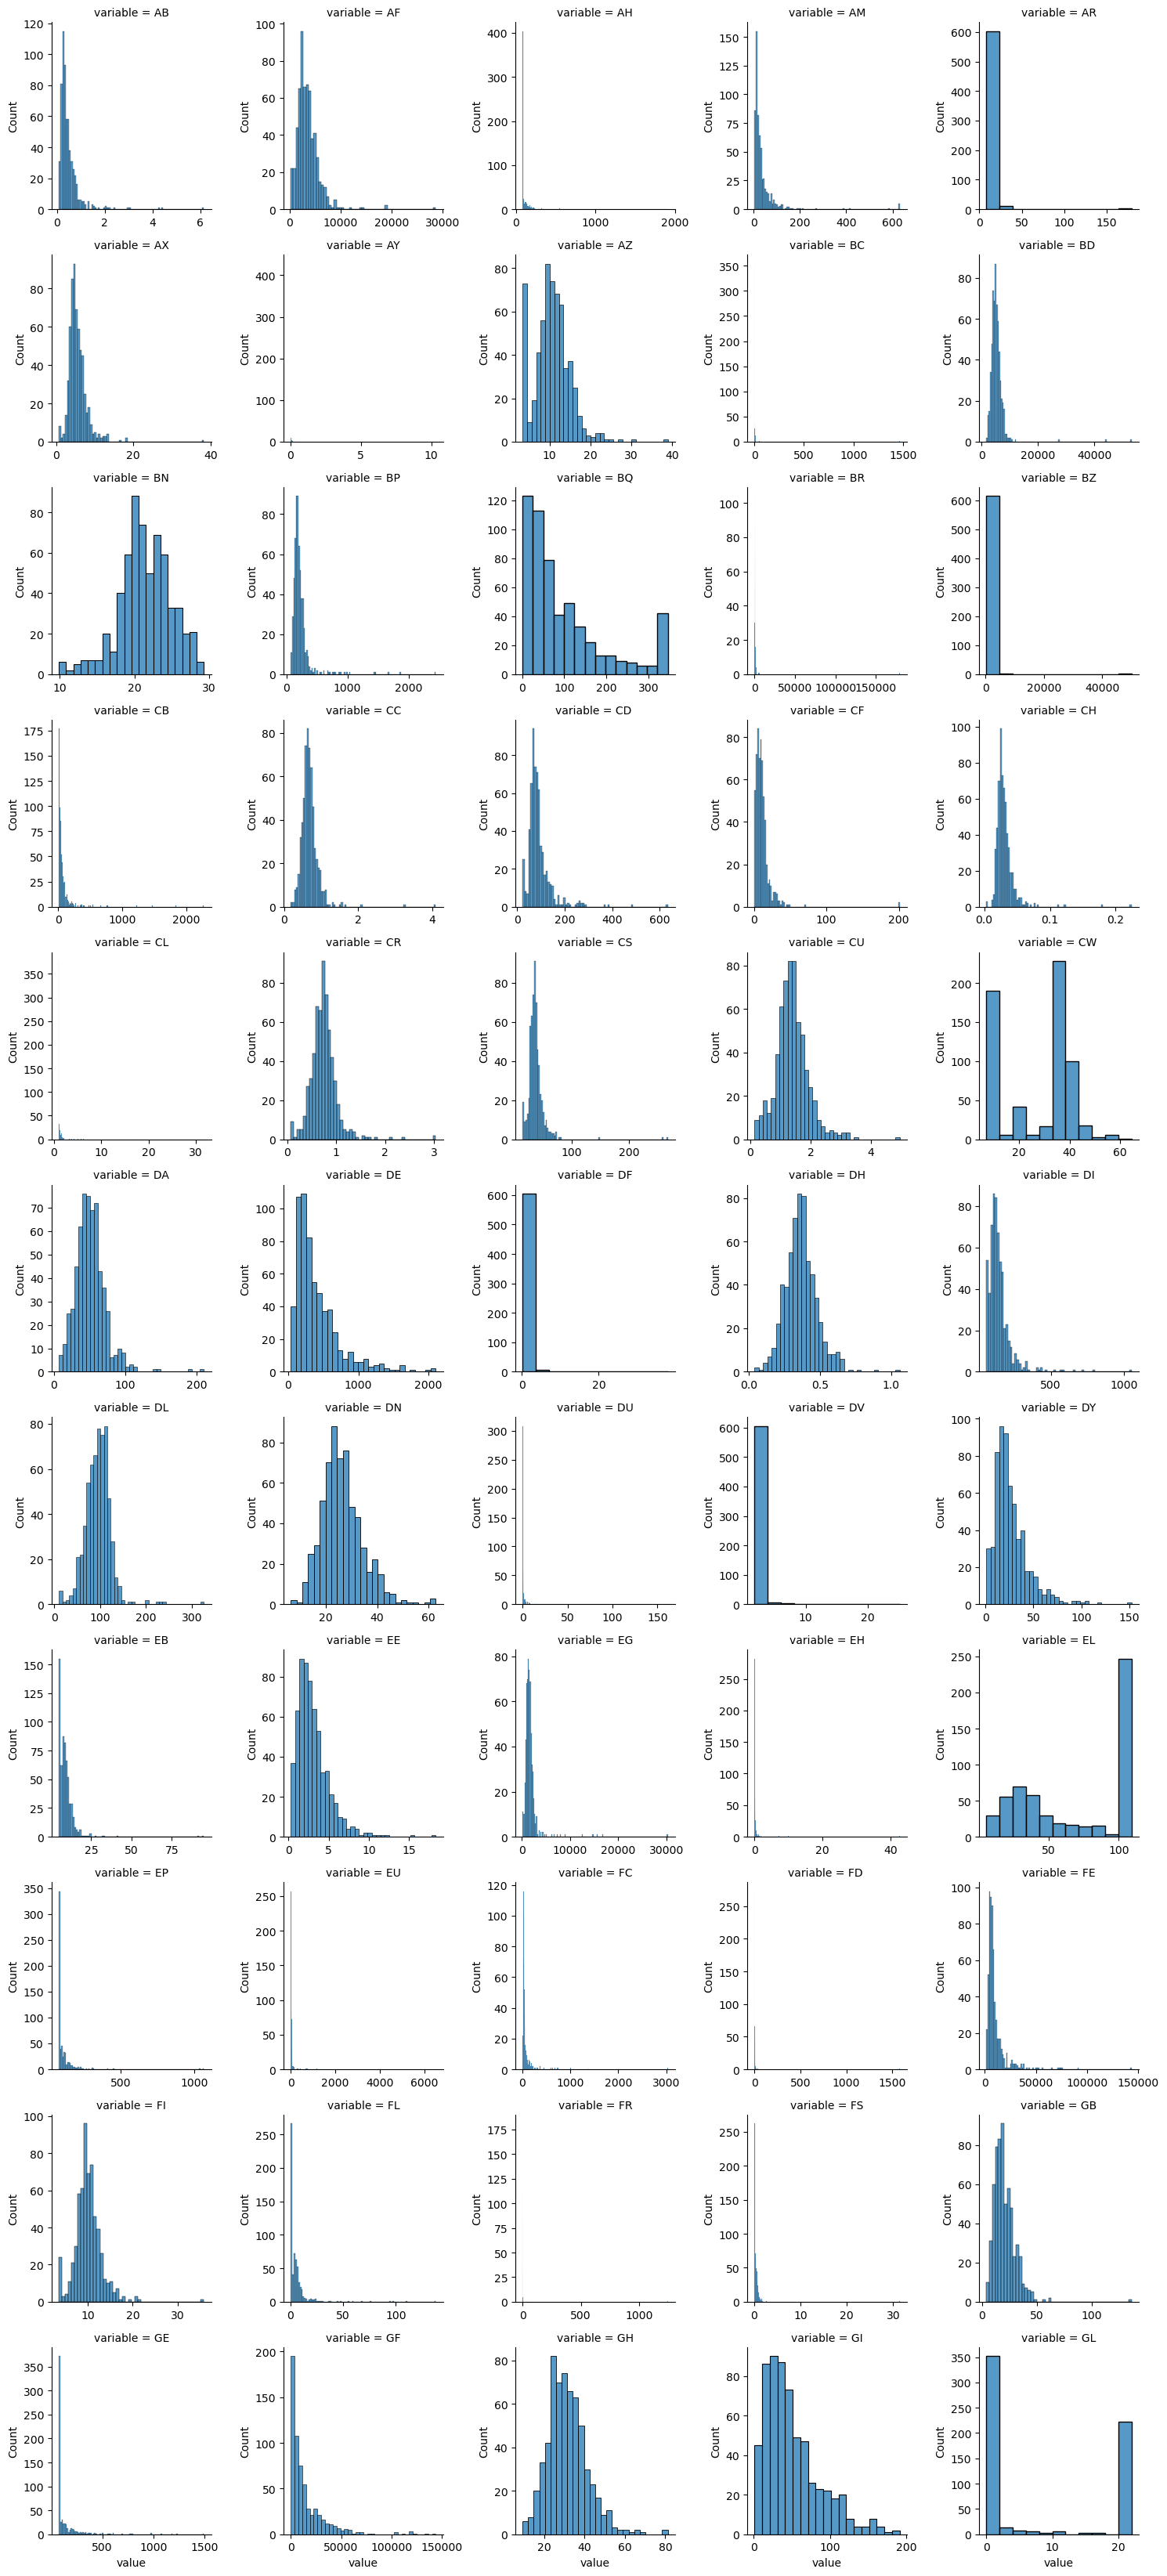

In [15]:
num = [f for f in df_train_greeks.columns if df_train_greeks.dtypes[f] != 'object']
num.remove("Class")
nd = pd.melt(df_train_greeks, value_vars = num)
barplot_train = sns.FacetGrid (nd, col='variable',
                    col_wrap=5, 
                    sharex=False, 
                              sharey = False
                   )
barplot_train = barplot_train.map(sns.histplot, 'value')
plt.show("barplot_train")

We can see that several variables are not normally distributed. 
Are these variables highly correlated among each other ? Let's explore this visually with a heatmap. 

### 2.2.2. Correlation Among all Numerical Features

In [16]:
# Define Display a correlation heatmap Function
def display_correlation_heatmap(df, title):
    corr_mat = np.round(df.corr(), 3)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap='coolwarm', cbar=False, square=True, linewidths=.5, annot_kws={"size": 12}, ax=ax)

    ax.set_title(title, fontsize=16, pad=20, y=1.05)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()
       
def plot_correlation_heatmap(df, column_name):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation heatmap for {column_name}')
    plt.show()

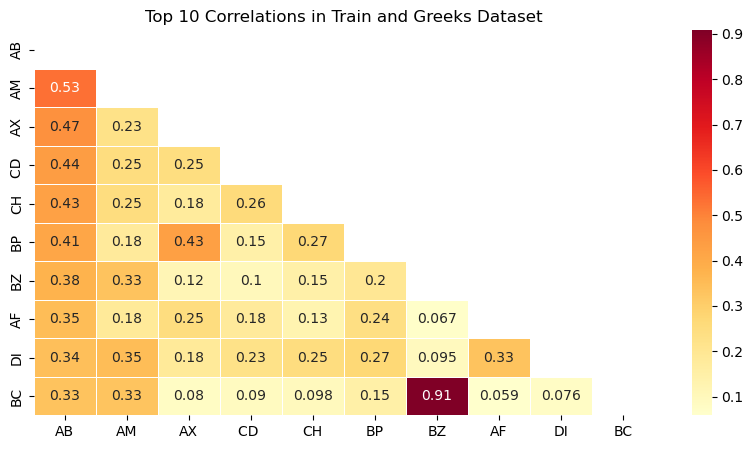

In [17]:
# Display a correlation heatmap
def plot_top_correlations(df: pd.core.frame.DataFrame, n: int, title_name: str='Top Correlations') -> None:
    # Calculate correlation between all variables
    corr = df.corr()

    # Select variables having highest absolute correlation
    top_corr_cols = corr.abs().nlargest(n, columns=corr.columns).index
    top_corr = corr.loc[top_corr_cols, top_corr_cols]

    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(top_corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(top_corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

# Plot heatmap of top 12 correlations in training data
plot_top_correlations(numericalFeatures, 10, 'Top 10 Correlations in Train and Greeks Dataset')

After plotting the correlation matrix and color scaling the background, we can see the pairwise correlation between all the variables. Most of variables are not highly correlated apart from variable BZ and BC.
This will create multicollinearity and probably overfitting problem in the future models which will make it hard to interpret model. **As we do not have clarity on what BZ and BC are, we will just remove both of them from model features.**

### 2.2.3. Numerical Variables distribution in Target group

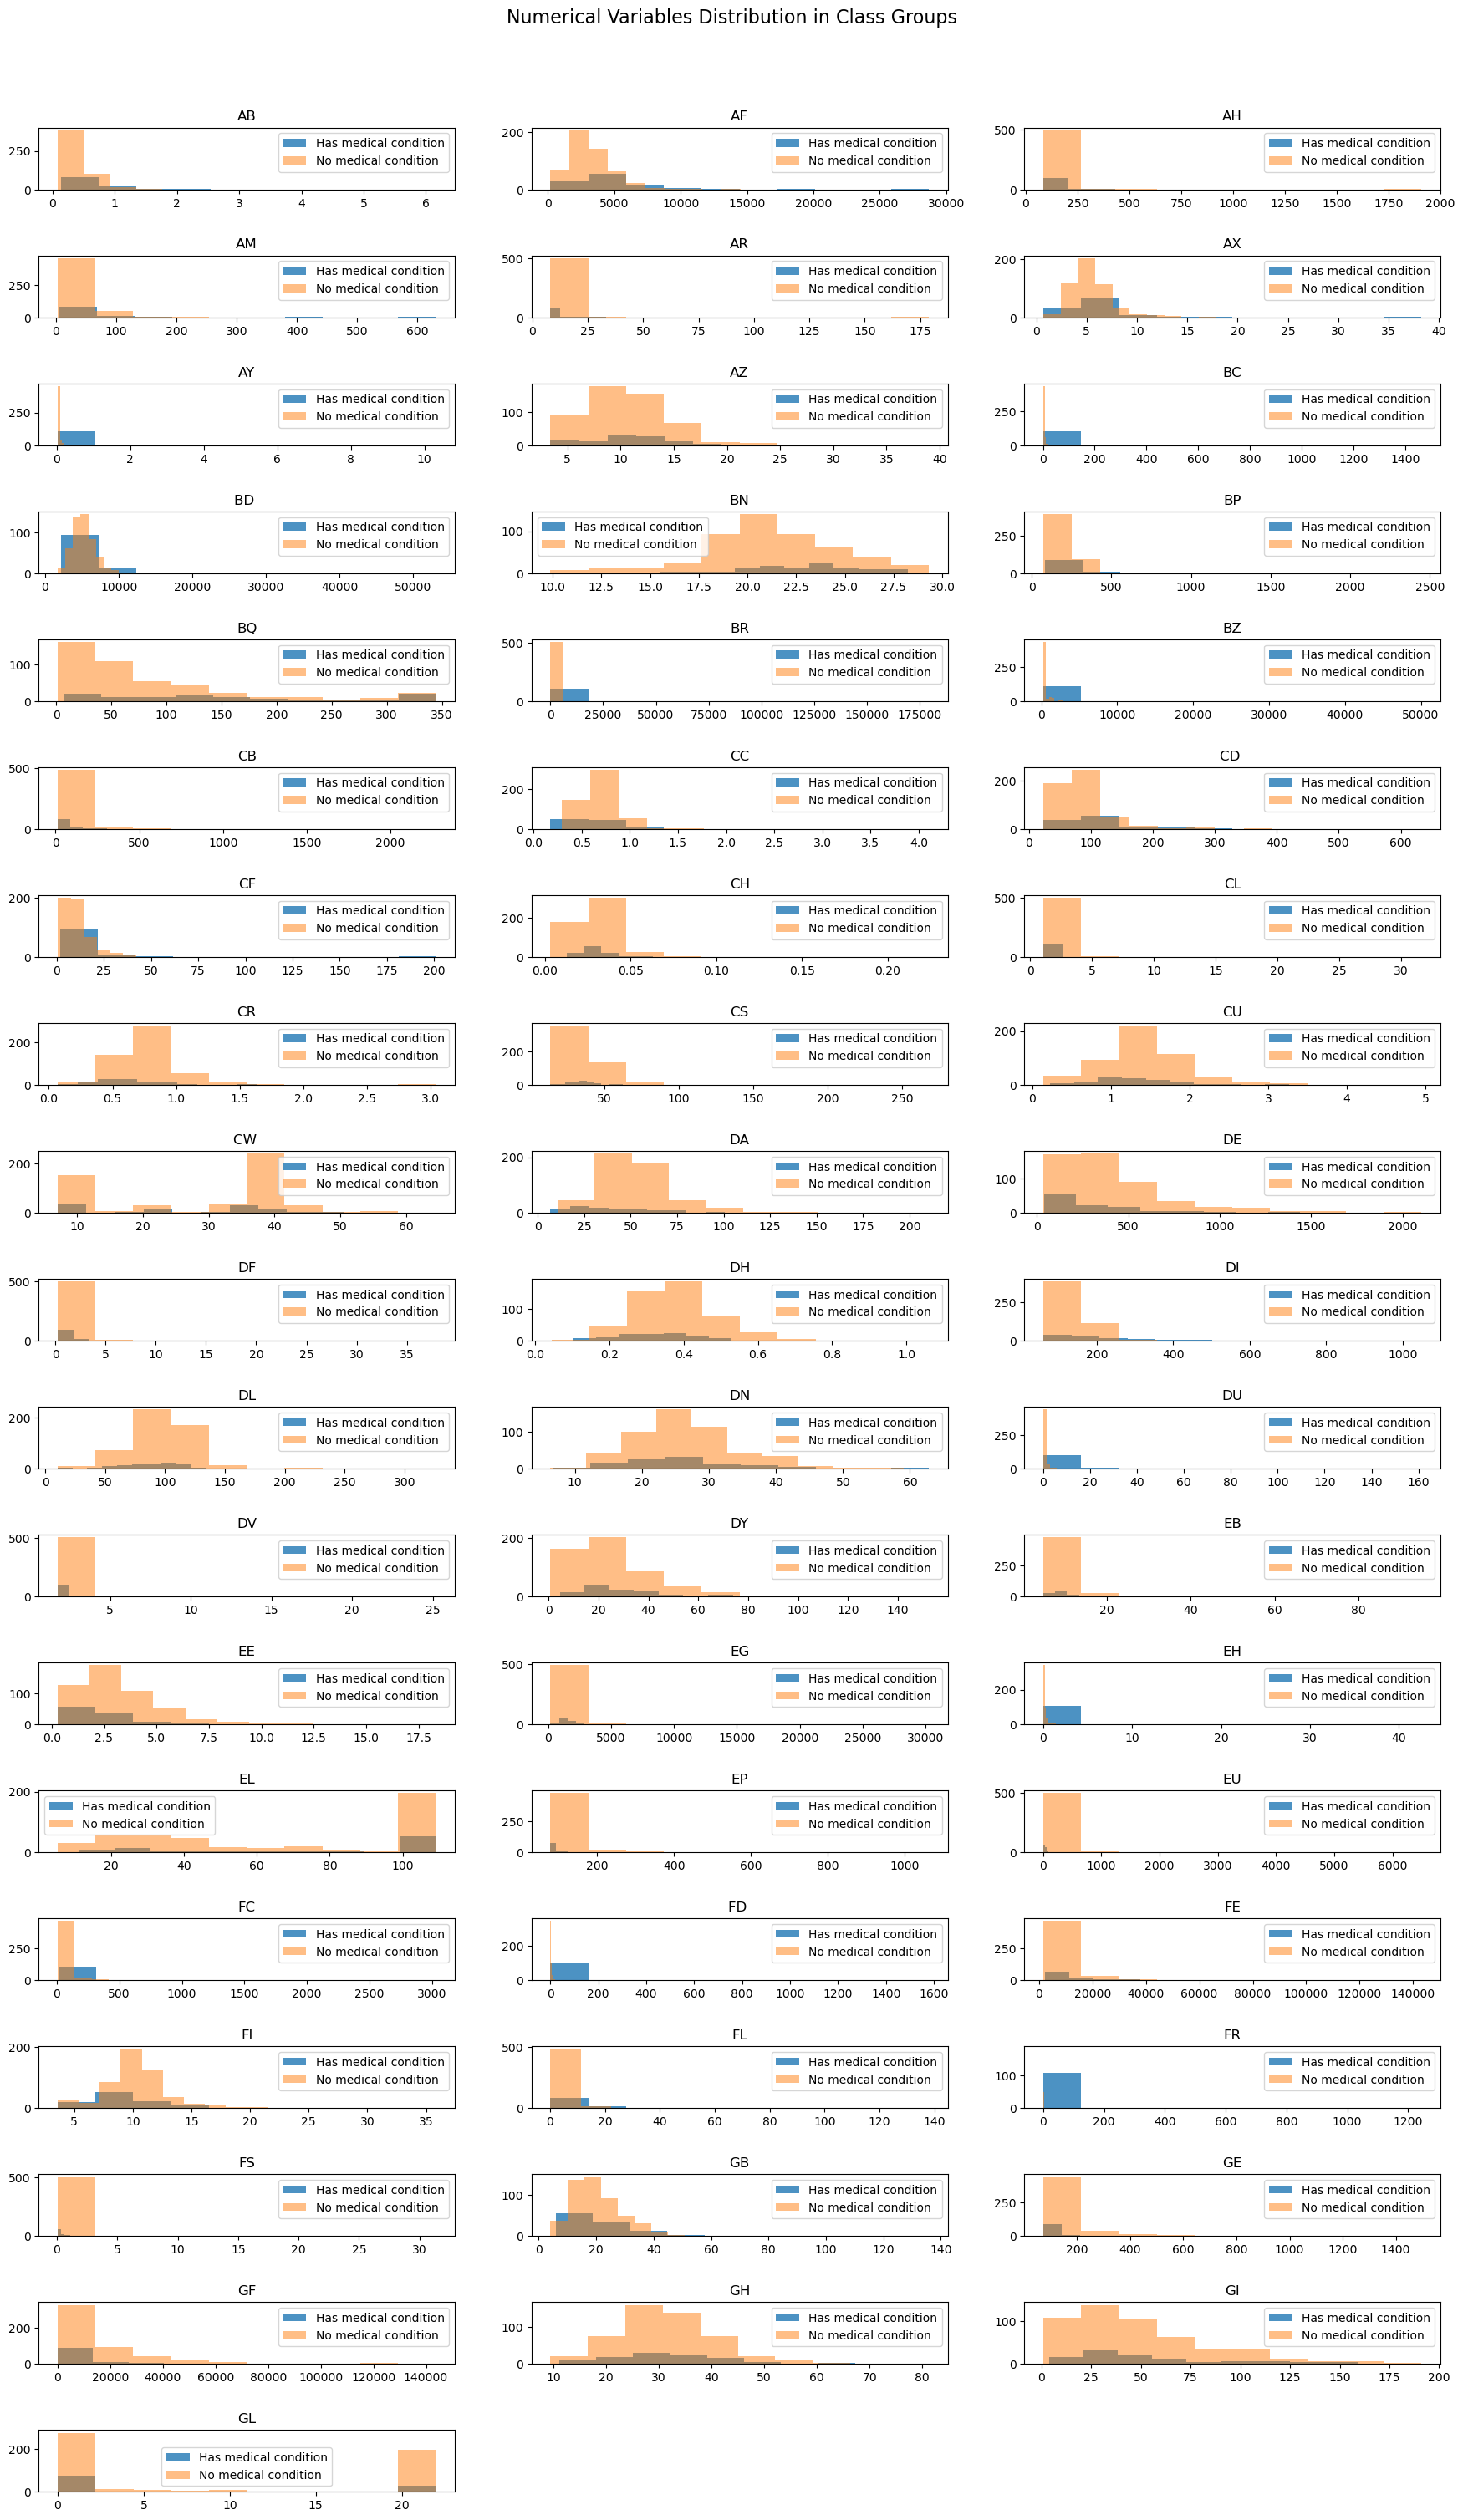

	 Class Rate

AB
(0.132, 0.735]    0.146435
(0.735, 1.338]    0.295082
(1.338, 1.941]    0.500000
(1.941, 2.544]    0.833333
(2.544, 3.147]    0.500000
(3.147, 3.75]          NaN
(3.75, 4.353]     0.000000
(4.353, 4.956]    1.000000
(4.956, 5.559]         NaN
(5.559, 6.162]    1.000000
Name: Class, dtype: float64 

AF
(192.593, 3042.153]       0.096429
(3042.153, 5891.712]      0.206107
(5891.712, 8741.272]      0.380952
(8741.272, 11590.831]     0.625000
(11590.831, 14440.39]     1.000000
(14440.39, 17289.95]      0.000000
(17289.95, 20139.509]     1.000000
(20139.509, 22989.069]         NaN
(22989.069, 25838.628]         NaN
(25838.628, 28688.188]    1.000000
Name: Class, dtype: float64 

AH
(85.2, 200.474]         0.117347
(200.474, 315.748]      0.388889
(315.748, 431.022]      0.333333
(431.022, 546.296]      0.500000
(546.296, 661.57]       0.000000
(661.57, 776.845]            NaN
(776.845, 892.119]      1.000000
(892.119, 1007.393]          NaN
(1007.393, 1122.667]         NaN


In [18]:
##  Distribution on target
i=1
f= plt.figure(figsize =(18,30))
Class_rates =[]

for col in num_cnt_cols:
    plt.subplot(19,3,i)
    n,bins,patchs = plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==1],
                            label =['Has medical condition'],alpha =0.8)
    plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==0],
                            label =['No medical condition'],alpha =0.5)
    plt.title(col)
    plt.legend()
    i+=1
    
    #Survival rate
    Class_rates.append(pd.concat([pd.cut(df_train_greeks[col],bins),df_train_greeks['Class']],axis = 1).groupby([col]).Class.mean())


f.suptitle('Numerical Variables Distribution in Class Groups',fontsize=16, y=1.01)
plt.tight_layout(pad =2.5)
plt.show()

print('\t Class Rate\n')
for cl in Class_rates:
    print(cl,'\n')

The distribution of the data is showing the imbalance distribution of features among those who have the diseases and those who doesn't.

**Let's see if we can exclude some of the numeric feature's columns from models which have not significant mean of diagnosed**

In [19]:
mean_per_class ={}
for col in num_cnt_cols:
    mean_per_class.update({col:df_train_greeks[df_train_greeks['Class'] ==1][col].mean()/(df_train_greeks[df_train_greeks['Class'] ==0][col].mean() + df_train_greeks[df_train_greeks['Class'] ==1][col].mean())})

In [20]:
pr = pd.DataFrame(data = mean_per_class.values(),index = num_cnt_cols)
pr.rename(columns = {0:'Class1_percentage'},inplace =True)
pr.sort_values(by ='Class1_percentage',ascending =False).T

FR        DU        BC      FD         EH        AY  \
Class1_percentage  0.92938  0.906085  0.899074  0.89344  0.870828  0.751835   

                        BR        FL        AM        BZ  ...        EP  \
Class1_percentage  0.74617  0.735579  0.705995  0.704574  ...  0.469556   

                         DH        GE        DA        CR        EE        DE  \
Class1_percentage  0.455731  0.445469  0.439837  0.438828  0.435226  0.429058   

                         GL        GF        EU  
Class1_percentage  0.391896  0.370135  0.317557  

[1 rows x 55 columns]

### 2.3. Categorical Variables Distribution in Class Groups

EJ
A    0.126126
B    0.202532
Name: Class, dtype: float64 

Alpha
A    0.0
B    1.0
D    1.0
G    1.0
Name: Class, dtype: float64 

Beta
A    1.000000
B    0.267327
C    0.113022
Name: Class, dtype: float64 

Gamma
A    1.0
B    1.0
E    1.0
F    1.0
G    1.0
H    1.0
M    0.0
N    0.0
Name: Class, dtype: float64 

Delta
A    0.306667
B    0.118421
C    0.312500
D    0.500000
Name: Class, dtype: float64 



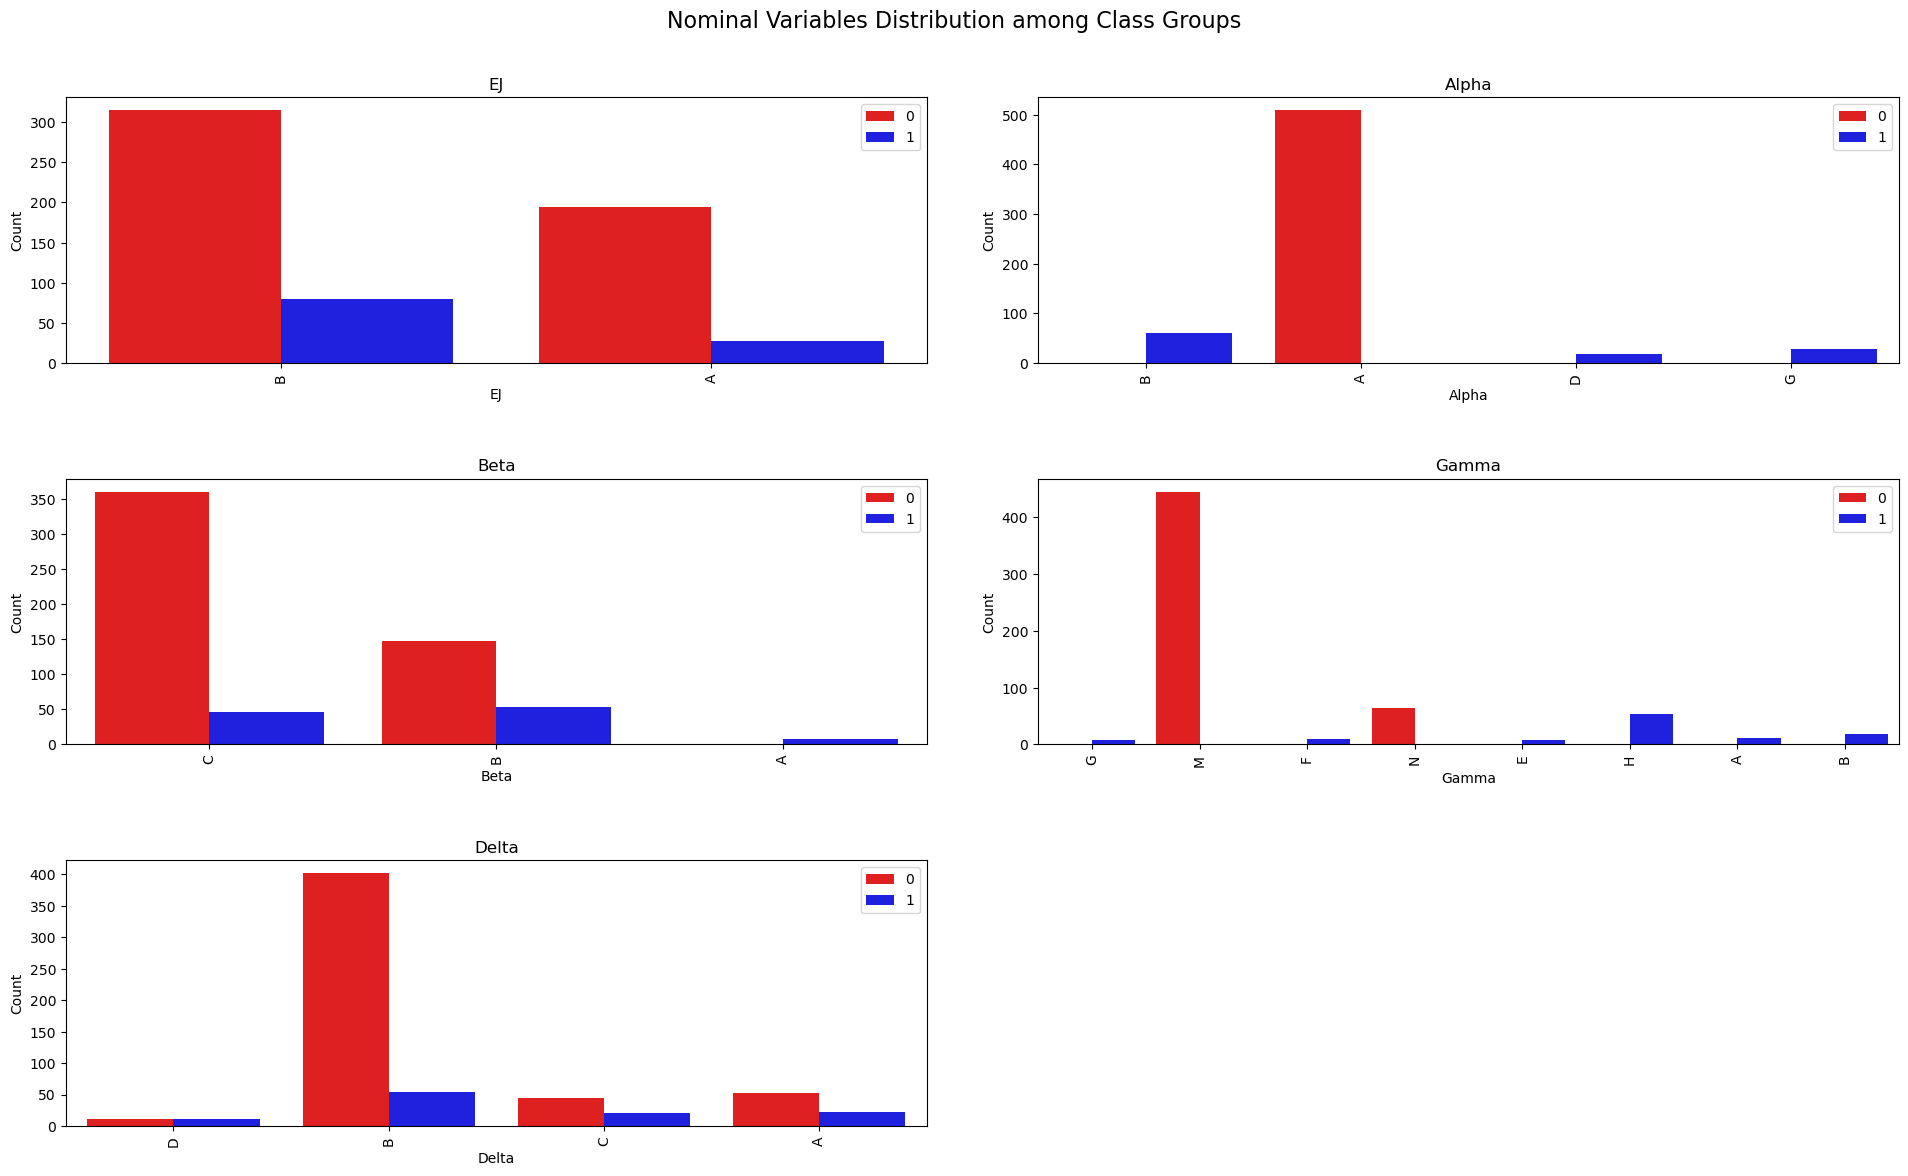

In [21]:
plt.figure(figsize =(20,12))
i = 1
for col in nominal_cols:
    cnt =pd.DataFrame(df_train_greeks[col].value_counts().reset_index())
    t = df_train_greeks.loc[df_train_greeks[col].isin(cnt['index'])]
    plt.subplot(3,2,i)
    sns.countplot(data =t, x =col,hue ='Class',palette=['r','b'])
    
    plt.legend(loc = 'upper right')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation =90)
    plt.title(col)
    i+=1
    print(df_train_greeks.groupby([col]).Class.mean(),'\n')
plt.tight_layout(pad =4)
plt.suptitle('Nominal Variables Distribution among Class Groups', fontsize =16, y=1.01)
plt.show()

üìç This has shown that these categorical variables are not well distributed among groups of people with one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0).

‚û§ EJ has 2 modalities which are A and B. There are more patients diagnosed with one or more of any of the three medical conditions in B than those in A.

‚û§ All patients in modality A in alpha have none of the three medical conditions.

‚û§ From the exploration of test data, Delta, Gamma and Beta are not present. As we have state previously for Alpha variable, there are some categories where there is no diagnosed patients on one of three conditions. This is more or less the same case in Gamma and Delta. It will be better to convert them into integer to improve the analysis on this characteristics. 

üôÜüèæ‚Äç‚ôÇÔ∏è Unfortunately, these features are not present in the test dataset. So we may not focus on them during the data modelling process. 

Let's have a look a our target then and understand more its distribution üèäüèΩ‚Äç‚ôÄÔ∏è

## 2.4. Target Distribution

First, let's first calculate the frequency table for those have one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). Secondly, we will generate the percentages in each group. Finaly, we will do a visualisation to show the distribution of our target.

#### *Frequency Table of Class*

In [22]:
freq_tab = pd.crosstab(index = df_train_greeks["Class"],  # Make a crosstab
                     columns="Total")                  # Name the count column
freq_tab

col_0  Total
Class       
0        509
1        108

#### *Percentage Table of Class*

In [23]:
my_tab = pd.crosstab(index = df_train_greeks["Class"],  # Make a crosstab
                     columns="Percentage")                  # Name the count column

my_tab/my_tab.sum()*100 # Calculate the percentages 

col_0  Percentage
Class            
0       82.495948
1       17.504052

#### *Visualisation of Class*

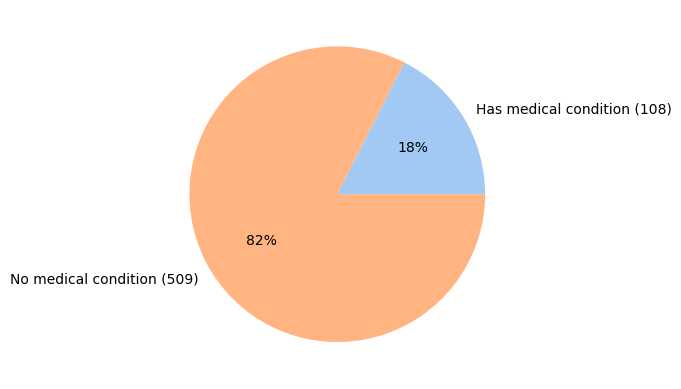

In [24]:
#define data
data_targ = [108, 509]
labels = ['Has medical condition (108)', 'No medical condition (509)']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:50]

#create pie chart
plt.pie(data_targ, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

‚éà In the train dataset around 18% subjects only have been diagnosed with one the three conditions.

‚éà This look like an extremely imbalance data as the number of people who has one or more of any of the three medical conditions is quite smaller than people with none of the three medical conditions. In the data wrangling part, we will see how to handle such issue. 

The distribution of the data confirmed the imbalance distribution of our features and target.

## 2.5. Data Wrangling

### 2.5.1. Missing Data

#### 2.5.1.1. Missing data exploration

Let's identify any missing value. Depending on the extend, we will decide on droping the variable or imput the data based on the missingness mecanism.

In [25]:
mis_data_count = train_raw.isnull().sum()
mis_data_percent = train_raw.isnull().sum() / len(train_raw) * 100

missing_dataframe = pd.DataFrame({
    'Count': mis_data_count,
    'Percent': mis_data_percent
})



missing_dataframe = missing_dataframe[missing_dataframe.Count > 0]
missing_dataframe.sort_values(by='Count', ascending=False, inplace=True)

print(f"‚éÜ There are {missing_dataframe.shape[0]} features having missing data.\n")
print("‚éÜ Missing value features:")
missing_dataframe.head(9)

‚éÜ There are 9 features having missing data.

‚éÜ Missing value features:


Count   Percent
BQ     60  9.724473
EL     60  9.724473
CC      3  0.486224
CB      2  0.324149
FS      2  0.324149
DU      1  0.162075
FC      1  0.162075
FL      1  0.162075
GL      1  0.162075

üëÄ Let's have a look at missing data visually. 

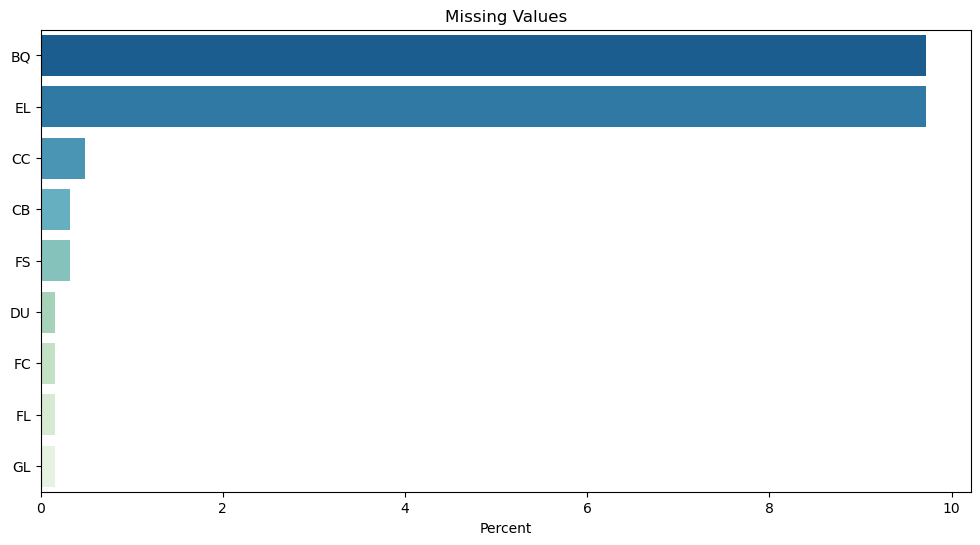

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_dataframe.index,
            x=missing_dataframe.Percent,
            palette='GnBu_r')
title = plt.title("Missing Values")
plt.show()

#### 2.5.1.2. Missing Data Imputation

Giving that all these variables missing variables are numeric variables, I will impute them with their medians because 
the distribution of these data values are skewed. 

In [27]:
specific_vars = [
    'BQ', 'EL', 'CC', 'CB', 'FS', 'DU', 'FC', 'FL', 'GL'
]

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

train_raw[specific_vars] = pd.DataFrame(imputer.fit_transform(train_raw[specific_vars]), index = train_raw.index)

Now, let's verify if there are still missing data in our dataset. 

In [28]:
sum(train_raw.isnull().sum())

0

üï∫üèΩ There are no more missing data in our train data. 

### 2.5.2. Data Recoding

In [29]:
# convert categorical data in numerical for categorical column
train_raw['EJ'] = train_raw['EJ'].replace({'A': 0, 'B': 1})
test['EJ'] = test['EJ'].replace({'A': 0, 'B': 1})

# 3. Data Modelling

## 3.1. Data Spliting 

In [30]:
# data spliting
X = train_raw.drop(['Id','Class'], axis=True)
Y = train_raw['Class']
data_cols = X.columns[1:-1].to_list()

# Split the dataset into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 3.2. Features Selection

### 3.2.1. Features Selection Based on Variance Thresholding

Feature selection based on variance thresholding is a technique used to identify and remove low-variance features from a dataset. The rationale behind this approach is that features with very low variance typically contain little information and are unlikely to have a significant impact on the model's performance.

**‚Üí Perform variance thresholding**

In [31]:
# Create VarianceThreshold object to perform variance thresholding
sfv = VarianceThreshold(threshold = 0.2)

# Perform variance thresholding
sfv.fit_transform(X)

array([[2.09377000e-01, 3.10903329e+03, 8.52001470e+01, ...,
        2.21362290e+01, 6.98349440e+01, 1.20342857e-01],
       [1.45282000e-01, 9.78764160e+02, 8.52001470e+01, ...,
        2.91354300e+01, 3.21319960e+01, 2.19780000e+01],
       [4.70030000e-01, 2.63510654e+03, 8.52001470e+01, ...,
        2.80228510e+01, 3.51926760e+01, 1.96941176e-01],
       ...,
       [4.27300000e-01, 2.45910720e+03, 1.30138587e+02, ...,
        2.61660720e+01, 1.19559420e+02, 2.19780000e+01],
       [3.63205000e-01, 1.26353524e+03, 8.52001470e+01, ...,
        2.51167500e+01, 3.71551120e+01, 1.84621622e-01],
       [4.82849000e-01, 2.67253426e+03, 5.46663930e+02, ...,
        4.57459740e+01, 1.14842372e+02, 2.19780000e+01]])

In [32]:
# Print the name and variance of each feature
for feature in zip(data_cols, sfv.variances_):
    print(feature)

('AF', 0.21903205775449486)
('AH', 5282908.453136707)
('AM', 16316.309707694647)
('AR', 4854.145404944297)
('AX', 110.46744875757281)
('AY', 6.500597511059686)
('AZ', 0.17345473339538947)
('BC', 18.897437937787256)
('BD ', 4239.847558920589)
('BN', 9113619.836837478)
('BP', 12.078807892146187)
('BQ', 33798.37436324237)
('BR', 8506.157415342635)
('BZ', 57292068.1471695)
('CB', 4304330.123845787)
('CC', 25177.538735818343)
('CD ', 0.0692455760992842)
('CF', 2656.712826972224)
('CH', 183.87715943443203)
('CL', 0.00021892933083597375)
('CR', 3.6889016174298583)
('CS', 0.07894243755773987)
('CU', 297.64356705887315)
('CW ', 0.2897457867588811)
('DA', 214.15744696605955)
('DE', 449.1725931592866)
('DF', 100798.64647172135)
('DH', 3.651283629730728)
('DI', 0.012745794444564954)
('DL', 7398.5166935267525)
('DN', 796.3847606467983)
('DU', 64.517964986836)
('DV', 81.36548438745643)
('DY', 2.2003302718172613)
('EB', 327.68209705862836)
('EE', 38.381182567252225)
('EG', 4.2299136835142725)
('EH', 

**‚Üí Select features before and after variance thersholding**

In [34]:
X_data = sfv.fit_transform(X)
# Print the results
print('Number of features before variance thresholding: {}'.format(X.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data.shape[1]))

Number of features before variance thresholding: 56
Number of features after variance thresholding: 51


In [42]:
data_cols_s

array(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CD ', 'CF', 'CL', 'CS', 'CU', 'CW ', 'DA',
       'DE', 'DF', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG',
       'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'], dtype=object)

In [45]:
data_cols_s = sfv.get_feature_names_out()
data_cols_s 

array(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CD ', 'CF', 'CL', 'CS', 'CU', 'CW ', 'DA',
       'DE', 'DF', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG',
       'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'], dtype=object)

In [46]:
data_cols_s = sfv.get_feature_names_out()
print('The most important features based on variance thresholding are:')
for feature_list_index in sfv.get_support(indices = True):
    try:
        print('- ' + data_cols_s[feature_list_index])
    except IndexError:
        pass

The most important features based on variance thresholding are:
- AB
- AF
- AH
- AM
- AR
- AX
- BC
- BD 
- BN
- BP
- BQ
- BR
- BZ
- CB
- CD 
- CL
- CS
- CW 
- DE
- DF
- DI
- DL
- DN
- DU
- DY
- EB
- EE
- EG
- EH
- EJ
- EL
- EP
- EU
- FC
- FD 
- FE
- FI
- FL
- FR
- FS
- GB
- GE
- GF
- GH
- GI
- GL


### 3.2.2. Features Selection Based on Random Forest Classifier

In [47]:
# Let's create a random forest classifier
randforstcl = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Now train the classifier
randforstcl.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(data_cols_s, randforstcl.feature_importances_): 
    print(feature)

('AB', 0.029697003816818127)
('AF', 0.026111908976113773)
('AH', 0.006803398149894804)
('AM', 0.016115913069881665)
('AR', 0.003198714000227143)
('AX', 0.010939561631337897)
('AZ', 0.0037702847782881445)
('BC', 0.007113116907320526)
('BD ', 0.02244477998774217)
('BN', 0.009717434341597518)
('BP', 0.008476604198257059)
('BQ', 0.011852213262586295)
('BR', 0.027390425103938604)
('BZ', 0.015821442109513636)
('CB', 0.004059007282582456)
('CD ', 0.012239259411109918)
('CF', 0.023442140289434202)
('CL', 0.016259318173266545)
('CS', 0.009248109113888124)
('CU', 0.008371221483687104)
('CW ', 0.007797760073009139)
('DA', 0.040728012527471984)
('DE', 0.006768149015055992)
('DF', 0.017755772126090665)
('DI', 0.004439695194077307)
('DL', 0.03673557297179527)
('DN', 0.04908558587489381)
('DU', 0.011270235999244769)
('DV', 0.026760250648873468)
('DY', 0.030432495655044037)
('EB', 0.016854695368262153)
('EE', 0.008048074240635701)
('EG', 0.0764085599108799)
('EH', 0.004548419665499437)
('EJ', 0.009554

 Let's have a look at it vizualy

ValueError: The number of FixedLocator locations (56), usually from a call to set_ticks, does not match the number of labels (51).

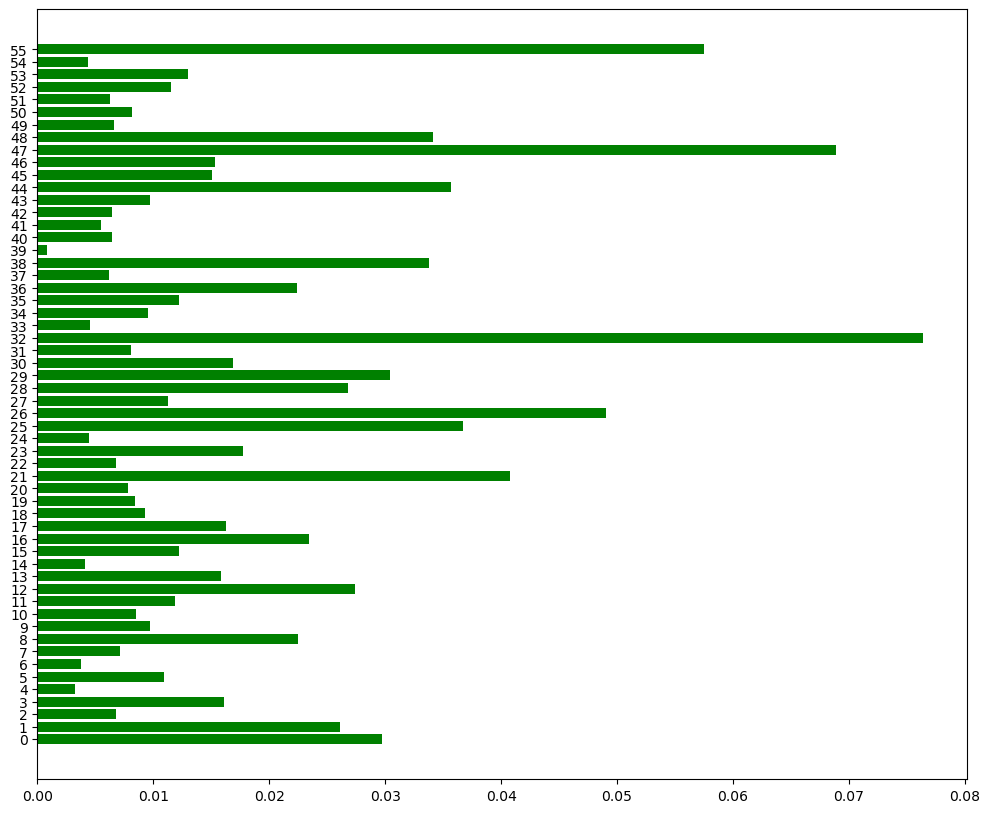

In [49]:
fig, ax = plt.subplots(figsize = (12,10))
y_pos = np.arange(len(randforstcl.feature_importances_))
ax.barh(y_pos, 
        randforstcl.feature_importances_,
        color ='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(data_cols_s)
#ax.set_xlabel('Features Importance')
plt.show()

In [51]:
data_cols_s

array(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CD ', 'CF', 'CL', 'CS', 'CU', 'CW ', 'DA',
       'DE', 'DF', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG',
       'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'], dtype=object)

In [50]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [ ]:
# Create a SelectFromModel object 
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.01) # that have an importance of more than 0.1

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier are:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + data_cols_selected[feature_list_index])

In [ ]:
data_cols_selected_final = data_cols_selected[sfm.get_support(indices =True)]
data_cols_selected_final

In [ ]:
print('Number of features finaly selected is: {}'.format(len(data_cols_selected_final)))

### 3.2.2. Feature Selection through PCA

In [ ]:
pca = PCA(n_components=44)
X_pca = pca.fit_transform(X_data)
X_pca = StandardScaler().fit_transform(X_pca)

In [ ]:
def grid_test(model_name, model, parameters, X = X_data,Y = Y):
    model= GridSearchCV(
        model,
        parameters,
        cv =6,
        scoring = 'accuracy')
    model.fit(X,Y)
        
    print(model,':', model.best_score_,'\n')
    return model_name, model.best_score_,model.best_estimator_

In [ ]:
def grid_test_pca(model_name, model, parameters, X = X_pca,Y = Y):
    model= GridSearchCV(
        model,
        parameters,
        cv =6,
        scoring ='accuracy')
    model.fit(X,Y)
        
    print(model,':', model.best_score_,'\n')
    return model_name, model.best_score_,model.best_estimator_

In [ ]:
lgbm_parameters ={
    'n_estimators':[200,201,199],
    'learning_rate':[0.0901,0.09,0.0905],
    'num_leaves':[19,20,21]
}

rf_parameters ={
    'n_estimators':[185,184,183],
    'random_state':[0,12,24]
}

lgbm = LGBMClassifier()
rf = RandomForestClassifier()


models=[('LGBM Classifier',lgbm,lgbm_parameters),('Random Forest Classifier',rf,rf_parameters)]
acc_dic ={}
model_dic ={}
for model in models:
    name, acc, best_model = grid_test(model[0],model[1],model[2])
    acc_dic[name] =acc
    model_dic[name] = best_model
pd.DataFrame.from_dict(acc_dic,orient ='index', columns=['Mean CV Accuracy']).sort_values(by = 'Mean CV Accuracy', ascending =False)